In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
import mesa
from lattice_models.model_rand_act import RSPRandAct
import random
# random.seed(0)
# np.random.seed(0)
from matplotlib.figure import Figure
import solara

In [25]:
color_map = {
    0: 'red',
    1: 'purple',
    2: 'yellow',
}
model_params = {
    "height": 200,
    "width": 200,
    "n_species": 3,
    "init0": 0.33,
    "init1": 0.33,
    "init2": 0.33,
    "init3": 0,
    "init4": 0,
    "invrate0": 0.33,
    "invrate1": 0.33,
    "invrate2": 0.33,
    "invrate3": 0,
    "invrate4": 0,
    "color_map": color_map,
}

model = RSPRandAct(**model_params)
for i in range(100):
    model.step()

In [26]:
def agent_portrayal(cell):
    '''
    This function is used to define the appearance of the agents in the visualization.
    '''
    return {"color": cell.color_map[cell.state], "marker": "s", "size": 1}

def draw_grid(grid, agent_portrayal):
    def portray(g):
        x = []
        y = []
        s = []  # size
        c = []  # color
        for i in range(g.width):
            for j in range(g.height):
                content = g._grid[i][j]
                if not content:
                    continue
                if not hasattr(content, "__iter__"):
                    # Is a single grid
                    content = [content]
                for agent in content:
                    data = agent_portrayal(agent)
                    x.append(i)
                    y.append(j)
                    if "size" in data:
                        s.append(data["size"])
                    if "color" in data:
                        c.append(data["color"])
        out = {"x": x, "y": y}
        # This is the default value for the marker size, which auto-scales
        # according to the grid area.
        out["s"] = (180 / max(g.width, g.height)) ** 2
        if len(s) > 0:
            out["s"] = s
        if len(c) > 0:
            out["c"] = c
        return out

    space_fig = Figure()
    space_ax = space_fig.subplots()
    space_ax.set_xlim(-1, grid.width)
    space_ax.set_ylim(-1, grid.height)
    space_ax.scatter(**portray(grid))
    return space_fig

def line_plot(model):
    '''
    This function is used to plot the fraction of individuals of each type over time.
    '''
    fig = Figure()
    ax = fig.subplots()
    model_data = model.datacollector.get_model_vars_dataframe()
    tot_individuals =model_data[0] + model_data[1] + model_data[2]
    model_data[0] = model_data[0] / tot_individuals
    model_data[1] = model_data[1] / tot_individuals
    model_data[2] = model_data[2] / tot_individuals
    model_data[[0, 1, 2]].plot(ax=ax, style='-o', color=['tab:red', 'purple', 'gold'])
    ax.legend(['$n_r$', '$n_s$', '$n_p$'])
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Fraction of Individuals')
    solara.FigureMatplotlib(fig)
    return fig

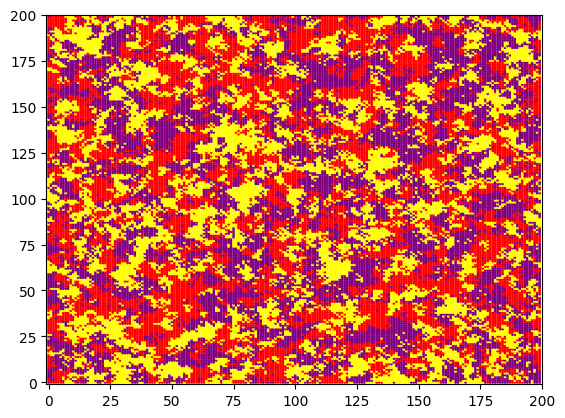

In [27]:
draw_grid(model.grid, agent_portrayal)

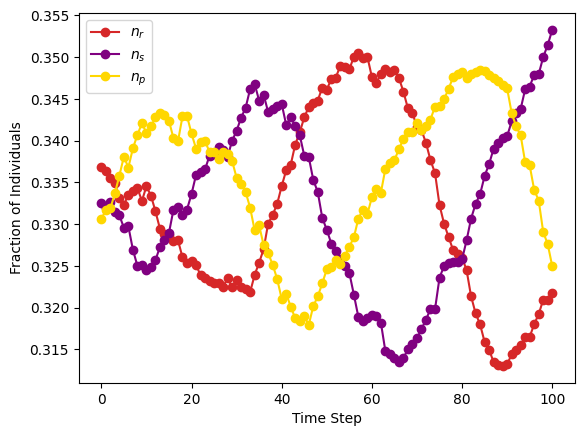

In [23]:
line_plot(model)

In [10]:
data = model.datacollector.get_model_vars_dataframe()
#grid_data = model.datacollector.get_model_vars_dataframe()["Grid"].iloc[-1]

In [11]:
data

,0,1,2
0,13268,13455,13277
1,13223,13475,13302
2,13220,13491,13289
3,13206,13461,13333
4,13217,13446,13337
...,...,...,...
96,13467,13090,13443
97,13435,13030,13535
98,13386,13033,13581
99,13377,13019,13604


In [2]:
def compute_species_perc(df):
    df['$n_r$'] = df[0] / (df[0] + df[1] + df[2])
    df['$n_s$'] = df[1] / (df[0] + df[1] + df[2])
    df['$n_p$'] = df[2] / (df[0] + df[1] + df[2])
    return df

In [3]:
model_params = {
    "height": 32,
    "width": 32,
    "hex_grid": False,
    "r0": 0.5,
    "s0": 0.3,
    "p0": 0.2,
    "Pr": 0.2,
    "Ps": 0.5,
    "Pp": 0.3,
}
results = mesa.batch_run(
    RockScissorsPaper,
    parameters=model_params,
    iterations=1,
    max_steps=1000,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
results_df= pd.DataFrame(results)
results_df = compute_species_perc(results_df)
results_df

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/irenetesta/anaconda3/envs/cmcs/lib/python3.11/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


,RunId,iteration,Step,height,width,hex_grid,r0,s0,p0,Pr,Ps,Pp,0,1,2,$n_r$,$n_s$,$n_p$
0,0,0,0,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,499,316,209,0.487305,0.308594,0.204102
1,0,0,1,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,506,309,209,0.494141,0.301758,0.204102
2,0,0,2,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,509,317,198,0.497070,0.309570,0.193359
3,0,0,3,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,505,327,192,0.493164,0.319336,0.187500
4,0,0,4,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,520,325,179,0.507812,0.317383,0.174805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,996,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,553,244,227,0.540039,0.238281,0.221680
997,0,0,997,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,530,247,247,0.517578,0.241211,0.241211
998,0,0,998,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,518,251,255,0.505859,0.245117,0.249023
999,0,0,999,32,32,False,0.5,0.3,0.2,0.2,0.5,0.3,516,259,249,0.503906,0.252930,0.243164


<Axes: >

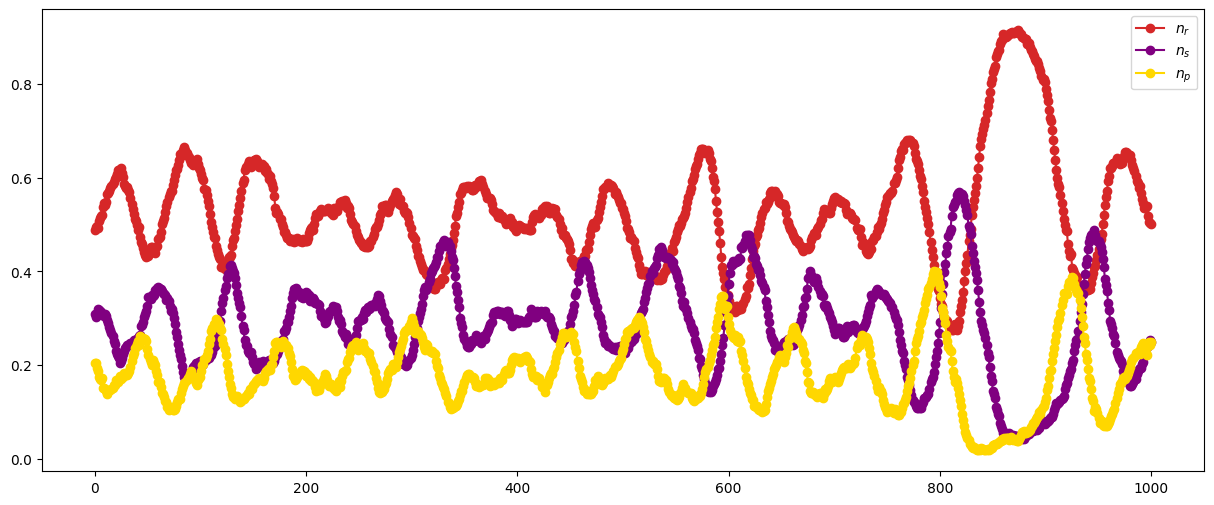

In [4]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[["$n_r$", "$n_s$", "$n_p$"]].plot(ax=axs, style='-o', color=['tab:red', 'purple', 'gold'])

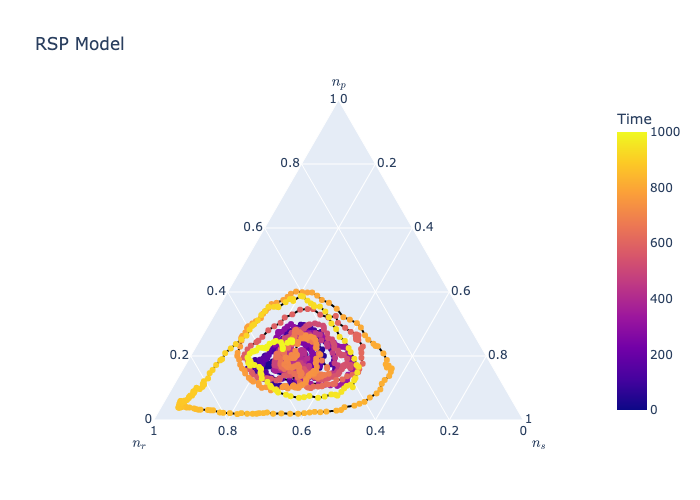

In [5]:
fig = px.scatter_ternary(
    results_df,
    a='$n_p$',
    b='$n_r$',
    c='$n_s$',
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show('png')

In [6]:
model_params = {
    "height": 100,
    "width": 100,
    "hex_grid": False,
    "r0": 0.33,
    "s0": 0.33,
    "p0": 0.33,
    "Pr": 0.2,
    "Ps": 0.5,
    "Pp": 0.3,
}
results = mesa.batch_run(
    RockScissorsPaper,
    parameters=model_params,
    iterations=1,
    max_steps=300,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
results_df= pd.DataFrame(results)
results_df = compute_species_perc(results_df)
results_df

  0%|          | 0/1 [00:00<?, ?it/s]

,RunId,iteration,Step,height,width,hex,init0,init1,init2,inv0,inv1,inv2,color_map,0,1,2,$n_r$,$n_s$,$n_p$
0,0,0,0,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3357,3330,3313,0.3357,0.3330,0.3313
1,0,0,1,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3259,3653,3088,0.3259,0.3653,0.3088
2,0,0,2,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3230,3932,2838,0.3230,0.3932,0.2838
3,0,0,3,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3249,4216,2535,0.3249,0.4216,0.2535
4,0,0,4,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",3293,4409,2298,0.3293,0.4409,0.2298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,296,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",5399,2903,1698,0.5399,0.2903,0.1698
297,0,0,297,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",5399,2890,1711,0.5399,0.2890,0.1711
298,0,0,298,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",5386,2893,1721,0.5386,0.2893,0.1721
299,0,0,299,100,100,False,0.33,0.33,0.33,0.2,0.5,0.3,"{0: 'red', 1: 'purple', 2: 'yellow'}",5416,2853,1731,0.5416,0.2853,0.1731


<Axes: >

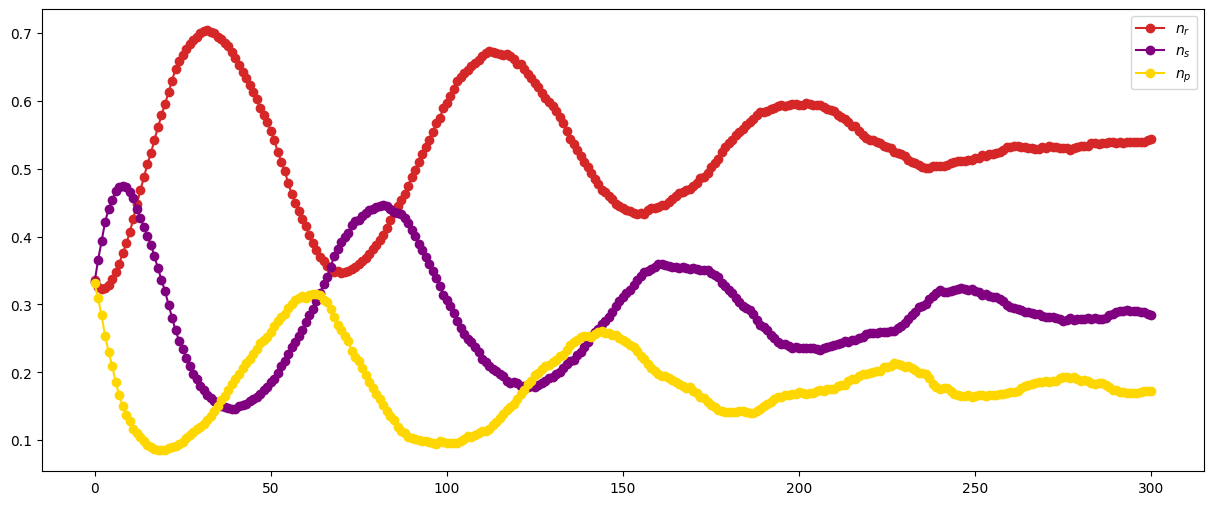

In [7]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[["$n_r$", "$n_s$", "$n_p$"]].plot(ax=axs, style='-o', color=['tab:red', 'purple', 'gold'])

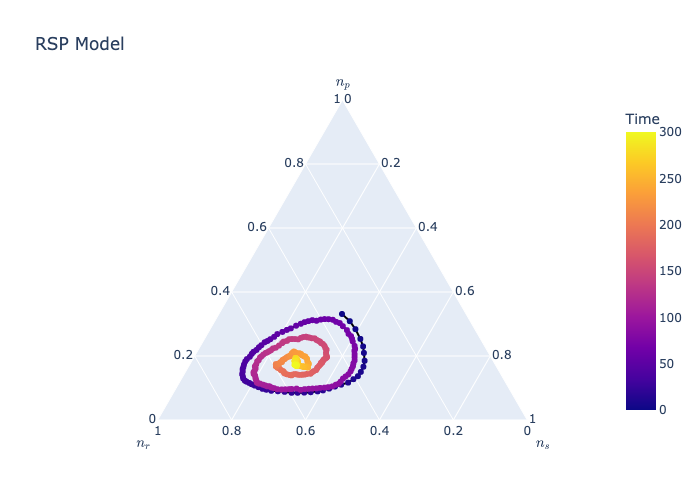

In [8]:
fig = px.scatter_ternary(
    results_df,
    a='$n_p$',
    b='$n_r$',
    c='$n_s$',
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show('png')

In [9]:
model_params = {
    "height": 100,
    "width": 100,
    "hex_grid": False,
    "r0": 0.5,
    "s0": 0.3,
    "p0": 0.2,
    "Pr": 0.33,
    "Ps": 0.33,
    "Pp": 0.33,
}
results = mesa.batch_run(
    RockScissorsPaper,
    parameters=model_params,
    iterations=1,
    max_steps=300,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
results_df= pd.DataFrame(results)
results_df = compute_species_perc(results_df)
results_df

  0%|          | 0/1 [00:00<?, ?it/s]

,RunId,iteration,Step,height,width,hex,init0,init1,init2,inv0,inv1,inv2,color_map,0,1,2,$n_r$,$n_s$,$n_p$
0,0,0,0,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",4977,3005,2018,0.4977,0.3005,0.2018
1,0,0,1,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",5140,2696,2164,0.5140,0.2696,0.2164
2,0,0,2,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",5204,2437,2359,0.5204,0.2437,0.2359
3,0,0,3,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",5219,2234,2547,0.5219,0.2234,0.2547
4,0,0,4,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",5167,2095,2738,0.5167,0.2095,0.2738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,296,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",3204,3584,3212,0.3204,0.3584,0.3212
297,0,0,297,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",3220,3558,3222,0.3220,0.3558,0.3222
298,0,0,298,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",3261,3557,3182,0.3261,0.3557,0.3182
299,0,0,299,100,100,False,0.5,0.3,0.2,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",3279,3589,3132,0.3279,0.3589,0.3132


<Axes: >

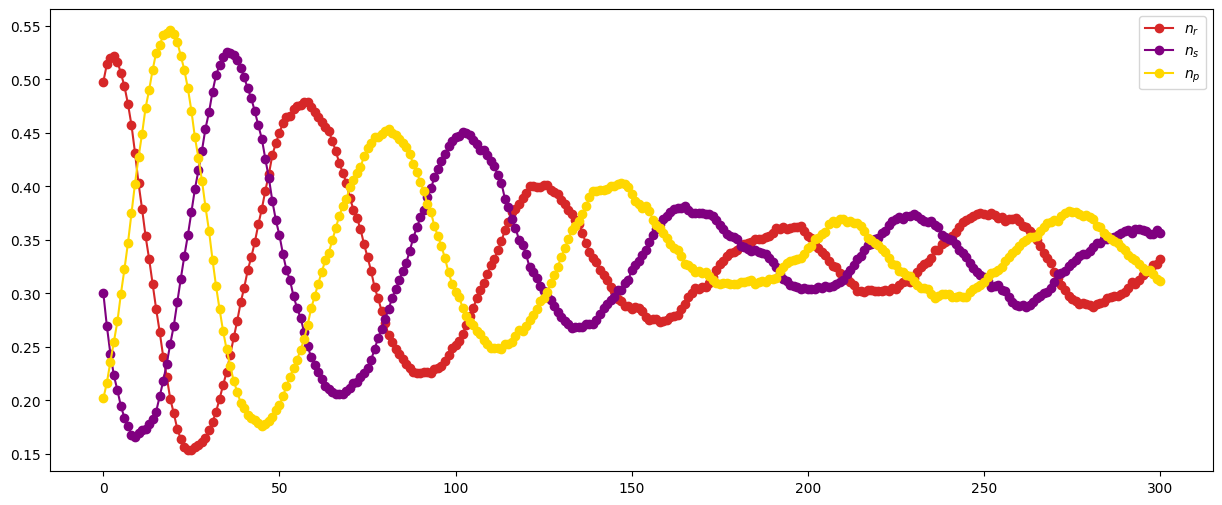

In [10]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[["$n_r$", "$n_s$", "$n_p$"]].plot(ax=axs, style='-o', color=['tab:red', 'purple', 'gold'])

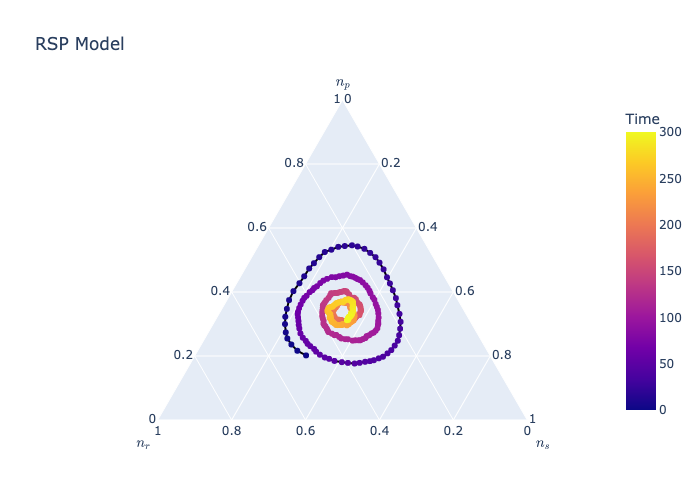

In [11]:
fig = px.scatter_ternary(
    results_df,
    a='$n_p$',
    b='$n_r$',
    c='$n_s$',
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))
fig.show('png')

In [13]:
R, S = np.mgrid[0:1:7j, 0:1:7j]
R, S = R.ravel(), S.ravel()
mask = R + S <= 1
R, S = R[mask], S[mask]
P = 1 - R - S
I = np.array([R, S, P])

In [ ]:
params = {
    "height": 100,
    "width": 100,
    "hex_grid": False,
    "r0": 0.33,
    "s0": 0.33,
    "p0": 0.33,
}
results_df = pd.DataFrame()
for i, invs in enumerate(I.T):
    params['Pr'] = invs[0]
    params['Ps'] = invs[1]
    params['Pp'] = invs[2]
    print(f"Running model with parameters: {params}")
    results = mesa.batch_run(
        RockScissorsPaper,
        params,
        iterations=1,
        max_steps=300,
        number_processes=1,
        data_collection_period=1,
        display_progress=True,
    )
    curr_results_df = pd.DataFrame(results)
    results_df = compute_species_perc(results_df)
    curr_results_df['inv_comb'] = i
    results_df = pd.concat([results_df, curr_results_df])
results_df.to_csv("agents_simulations_results.csv", index=False)
results_df

In [12]:
results_df = pd.read_csv("agents_simulations_results.csv")

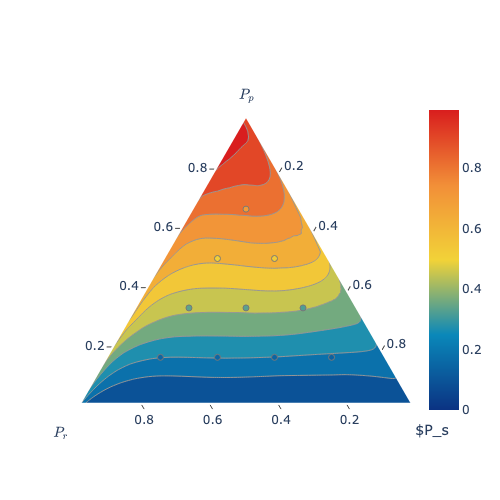

In [14]:
results_df['ns_prop'] = results_df['$n_s$'] / (results_df['$n_r$'] + results_df['$n_s$'] + results_df['$n_p$'])
ns_final = np.array(results_df[results_df['Step']>200].groupby('inv_comb')['ns_prop'].mean())
fig = ff.create_ternary_contour(
    np.array([I[2], I[1], I[0]]), ns_final,
    pole_labels=['$P_p$', '$P_r$', '$P_s'],
    interp_mode='ilr', #'cartesian'
    ncontours=10,
    colorscale='Portland', # Jet (turbo, rdylblu, spectral)
    coloring=None,
    showmarkers=True,
    showscale=True,
)
fig.show('png')

In [15]:
I = np.array([
[0.2, 0.1, 0.7], [0.3, 0.1, 0.6], [0.4, 0.1, 0.5], [0.5, 0.1, 0.4], [0.6, 0.1, 0.3], [0.7, 0.1, 0.2],
[0.1, 0.2, 0.7], [0.1, 0.3, 0.6], [0.1, 0.4, 0.5], [0.1, 0.5, 0.4], [0.1, 0.6, 0.3], [0.1, 0.7, 0.2],
[0.2, 0.7, 0.1], [0.3, 0.6, 0.1], [0.4, 0.5, 0.1], [0.5, 0.4, 0.1], [0.6, 0.3, 0.1], [0.7, 0.2, 0.1]])

In [16]:
MAX_ITER = 5000
params = {
    "height": 32,
    "width": 32,
    "_grid": False,
    "r0": 0.33,
    "s0": 0.33,
    "p0": 0.33,
}
winners = []
results_df = pd.DataFrame()
for i, invs in enumerate(I):
    params['Pr'] = invs[0]
    params['Ps'] = invs[1]
    params['Pp'] = invs[2]
    print(f"Running model with parameters: {params}")
    results = mesa.batch_run(
        RockScissorsPaper,
        params,
        iterations=1,
        max_steps=MAX_ITER,
        number_processes=1,
        data_collection_period=1,
        display_progress=True,
    )
    curr_results_df = pd.DataFrame(results)
    curr_results_df = compute_species_perc(curr_results_df)
    if curr_results_df.index.stop==MAX_ITER:
        color = 'black'
    else:
        winner = np.argmax([
            curr_results_df.iloc[-1]['$n_r$'],
            curr_results_df.iloc[-1]['$n_s$'],
            curr_results_df.iloc[-1]['$n_p$']
        ])
        winners.append(winner)
    results_df = pd.concat([results_df, curr_results_df])
results_df

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.2, 'inv1': 0.1, 'inv2': 0.7}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.3, 'inv1': 0.1, 'inv2': 0.6}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.4, 'inv1': 0.1, 'inv2': 0.5}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.5, 'inv1': 0.1, 'inv2': 0.4}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.6, 'inv1': 0.1, 'inv2': 0.3}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.7, 'inv1': 0.1, 'inv2': 0.2}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.1, 'inv1': 0.2, 'inv2': 0.7}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.1, 'inv1': 0.3, 'inv2': 0.6}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.1, 'inv1': 0.4, 'inv2': 0.5}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.1, 'inv1': 0.5, 'inv2': 0.4}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.1, 'inv1': 0.6, 'inv2': 0.3}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.1, 'inv1': 0.7, 'inv2': 0.2}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.2, 'inv1': 0.7, 'inv2': 0.1}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.3, 'inv1': 0.6, 'inv2': 0.1}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.4, 'inv1': 0.5, 'inv2': 0.1}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.5, 'inv1': 0.4, 'inv2': 0.1}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.6, 'inv1': 0.3, 'inv2': 0.1}


  0%|          | 0/1 [00:00<?, ?it/s]

Running model with parameters: {'height': 32, 'width': 32, 'hex': False, 'init0': 0.33, 'init1': 0.33, 'init2': 0.33, 'color_map': [{0: 'red', 1: 'purple', 2: 'yellow'}], 'inv0': 0.7, 'inv1': 0.2, 'inv2': 0.1}


  0%|          | 0/1 [00:00<?, ?it/s]

,RunId,iteration,Step,height,width,hex,init0,init1,init2,color_map,inv0,inv1,inv2,0,1,2,$n_r$,$n_s$,$n_p$
0,0,0,0,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.2,0.1,0.7,334,358,332,0.326172,0.349609,0.324219
1,0,0,1,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.2,0.1,0.7,286,341,397,0.279297,0.333008,0.387695
2,0,0,2,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.2,0.1,0.7,221,340,463,0.215820,0.332031,0.452148
3,0,0,3,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.2,0.1,0.7,177,343,504,0.172852,0.334961,0.492188
4,0,0,4,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.2,0.1,0.7,140,363,521,0.136719,0.354492,0.508789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,96,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.7,0.2,0.1,1,0,1023,0.000977,0.000000,0.999023
97,0,0,97,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.7,0.2,0.1,1,0,1023,0.000977,0.000000,0.999023
98,0,0,98,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.7,0.2,0.1,1,0,1023,0.000977,0.000000,0.999023
99,0,0,99,32,32,False,0.33,0.33,0.33,"{0: 'red', 1: 'purple', 2: 'yellow'}",0.7,0.2,0.1,1,0,1023,0.000977,0.000000,0.999023


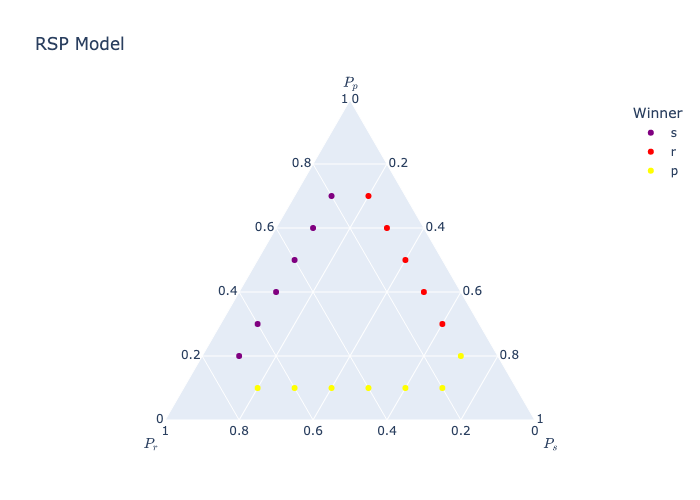

In [17]:
fig = px.scatter_ternary(
    pd.DataFrame(I, columns=['$P_r$', '$P_s$', '$P_p$']),
    a="$P_p$",
    b="$P_r$",
    c="$P_s$",
    size_max=10,
    title="RSP Model",
    color=['r' if w==0 else 's' if w==1 else 'p' for w in winners],
    color_discrete_map={'r': 'red', 's': 'purple', 'p': 'yellow'}
    )
fig.update_layout(legend_title_text='Winner')
fig.show('png')

In [3]:
model_params = {
    "height": 500,# 500
    "width": 500,# 500
    "hex_grid": False,
    "r0": 0.5/(0.005+0.5+0.3),
    "s0": 0.3/(0.005+0.5+0.3),
    "p0": 0.2/(0.005+0.5+0.3),
    "Pr": 0.05,
    "Ps": 0.5,
    "Pp": 0.3,
    "increase_rate": True,
}
results = mesa.batch_run(
    RockScissorsPaper,
    parameters=model_params,
    iterations=1,
    max_steps=2000, # 6000
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
results_df= pd.DataFrame(results)
results_df = compute_species_perc(results_df)
results_df

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/irenetesta/anaconda3/envs/cmcs/lib/python3.11/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


,RunId,iteration,Step,height,width,hex,init0,init1,init2,inv0,inv1,inv2,increase_rate,color_map,0,1,2,$n_r$,$n_s$,$n_p$
0,0,0,0,500,500,False,0.621118,0.372671,0.248447,0.05,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",124927,75404,49669,0.499708,0.301616,0.198676
1,0,0,1,500,500,False,0.621118,0.372671,0.248447,0.05,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",119404,81310,49286,0.477616,0.325240,0.197144
2,0,0,2,500,500,False,0.621118,0.372671,0.248447,0.05,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",114653,87156,48191,0.458612,0.348624,0.192764
3,0,0,3,500,500,False,0.621118,0.372671,0.248447,0.05,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",110597,92904,46499,0.442388,0.371616,0.185996
4,0,0,4,500,500,False,0.621118,0.372671,0.248447,0.05,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",107112,98622,44266,0.428448,0.394488,0.177064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0,0,1996,500,500,False,0.621118,0.372671,0.248447,1.00,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",63136,35228,151636,0.252544,0.140912,0.606544
1997,0,0,1997,500,500,False,0.621118,0.372671,0.248447,1.00,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",63094,35381,151525,0.252376,0.141524,0.606100
1998,0,0,1998,500,500,False,0.621118,0.372671,0.248447,1.00,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",63045,35517,151438,0.252180,0.142068,0.605752
1999,0,0,1999,500,500,False,0.621118,0.372671,0.248447,1.00,0.5,0.3,True,"{0: 'red', 1: 'purple', 2: 'yellow'}",62821,35856,151323,0.251284,0.143424,0.605292


In [4]:
results_df.to_csv("agents_simulations_results_500.csv", index=False)

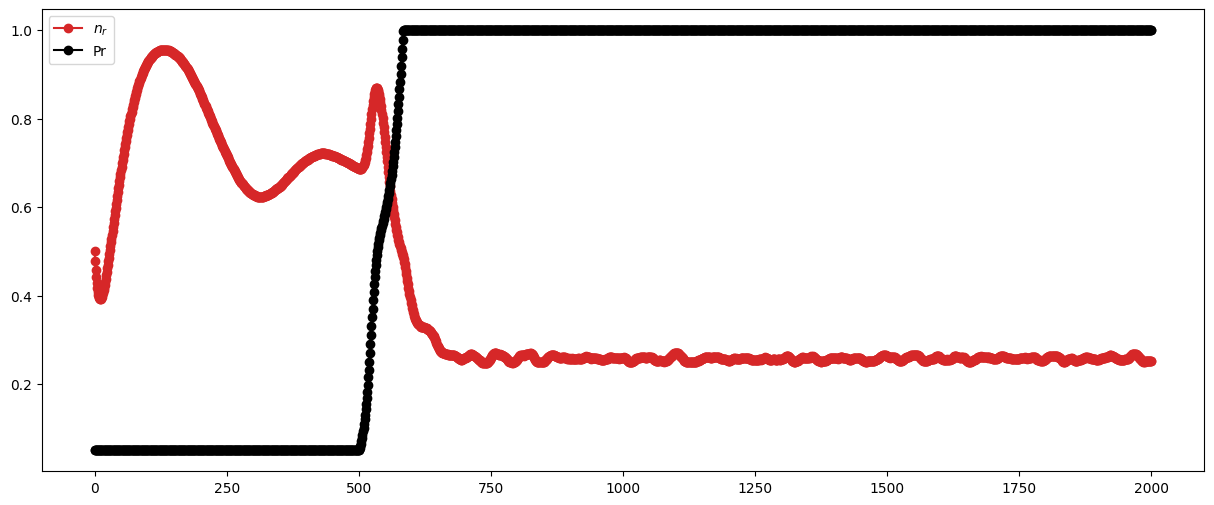

In [5]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[['$n_r$', 'Pr']].plot(ax=axs, style='-o', color=['tab:red', 'black'])
axs.legend(['$n_r$', 'Pr'])